## Gradient Descent

This notebook demonstrates the use of steepest gradient descent. The included dataset is the housing pricing data found on [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Gradient descent is used to determine the local optimum of a linear regression between square footage and a house's sale price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


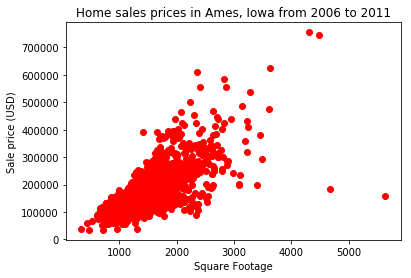

In [4]:
plt.plot(df.GrLivArea.values, df.SalePrice.values, 'ro')
plt.xlabel('Square Footage')
plt.ylabel('Sale price (USD)')
plt.title('Home sales prices in Ames, Iowa from 2006 to 2011')
plt.show()

In [5]:
prices = df.SalePrice.values
footage = df.GrLivArea.values

In [6]:
def computeError(m, b, points):
    err = 0.0
    for i in range(len(points)):
        err += (points[i].y - (m * points[i].x + b)) ** 2
    return err / float(len(points))

$$\frac{\partial}{\partial m} = \frac{2}{N}\sum_{i=1}^{N}-x_i\left(y_i - \left(mx_i + b\right)\right)$$
$$\frac{\partial}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}-\left(y_i - \left(mx_i + b\right)\right)$$

In [7]:
def gradientStep(m, b, points, learn_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    for i in range(int(N)):
        common = (points[i].y - ((m * points[i].x) + b))
        b_gradient = -(2 / N) * common
        m_gradient = -(2 / N) * points[i].x * common
    return (b - (learn_rate * b_gradient),
             m - (learn_rate * m_gradient))

In [8]:
def gradientRun(m_init, b_init, points, learn_rate, epochs):
    m = m_init
    b = b_init
    for i in range(epochs):
        b, m = gradientStep(m, b, points, learn_rate)
    return b, m

In [9]:
learn_rate = 0.00001
epochs = 5000
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [10]:
points = [Point(x, y) for x, y in zip(footage, prices)]

In [14]:
initial = {'m': 1, 'b': 0}
err_init = computeError(initial['m'], initial['b'], points)
print("Start with y = {0}*x + {1}; Error = {2}".format(initial['m'],
                                                       initial['b'],
                                                       err_init))
new_b, new_m = gradientRun(initial['m'], initial['b'], points, learn_rate, epochs)
err_final = computeError(new_m, new_b, points)
print("End with y = {0}*x + {1}; Error = {2}".format(new_m,
                                                       new_b,
                                                       err_final))
print("Error difference:" + str(abs(err_final - err_init)/(err_init) * 100) + "%")

Start with y = 1*x + 0; Error = 38434358058.74041
End with y = 117.43623192356154*x + 0.09270400630856818; Error = 3177858096.9949927
Error difference:91.73172583723611%


In [12]:
line_x = [0, 5000]
line_y = [new_b + new_m * x for x in line_x]

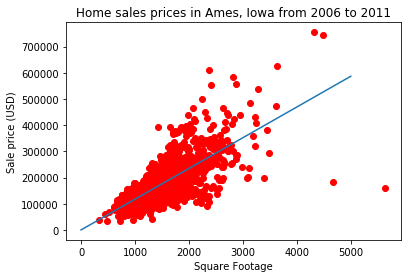

In [13]:
plt.plot(df.GrLivArea.values, df.SalePrice.values, 'ro')
plt.plot(line_x, line_y)
plt.xlabel('Square Footage')
plt.ylabel('Sale price (USD)')
plt.title('Home sales prices in Ames, Iowa from 2006 to 2011')
plt.show()